In [1]:
!pip install tensorflow --quiet

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import PIL.Image

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [23]:
directory = "../raw_data/dataset-resized/"
from glob import glob
folders = [x[28:] for x in glob(f"{directory}*")]
folders

['paper', 'metal', 'cardboard', 'trash', 'glass', 'plastic']

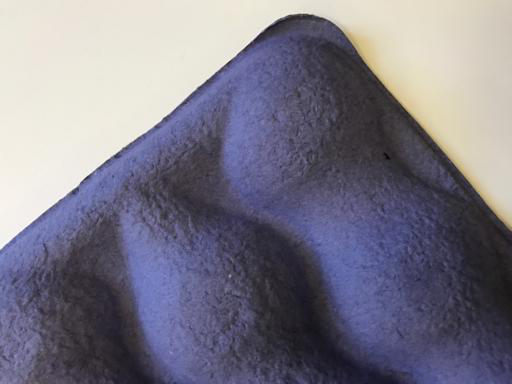

In [25]:
paper = list(glob(f'{directory}/paper/*'))
PIL.Image.open(str(paper[0]))

(384, 512, 3)

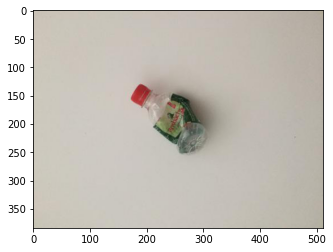

In [15]:
#just to check out the image:
img = plt.imread('../raw_data/dataset-resized/cardboard/plastic10.jpg')
display(img.shape)
plt.imshow(img);

In [5]:
#flatten the image
img = img.flatten()

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
data_projected=pca.fit_transform(img.reshape(1, -1))
data_projected.shape

/Users/Izzy/.pyenv/versions/3.8.6/envs/waste_classification/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:468: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ = (S ** 2) / (n_samples - 1)


(1, 1)

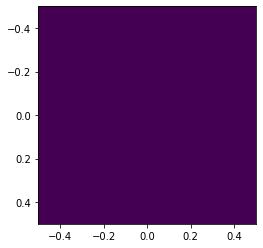

In [7]:
plt.imshow(data_projected)